In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline







In [5]:
# Load the dataset
file_path = "C:/Users/krish/Downloads/marketing_and_product_performance.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [7]:
df.describe()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


## Correlation


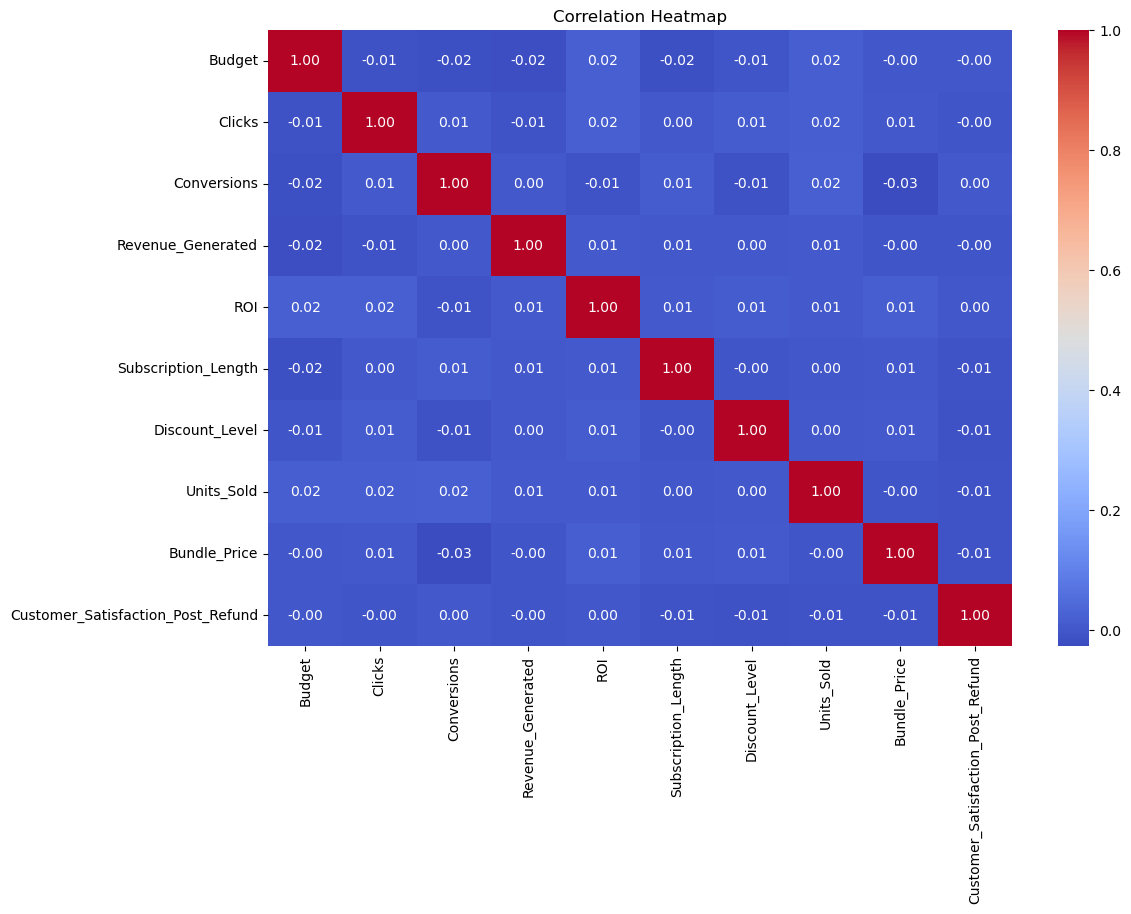

In [9]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

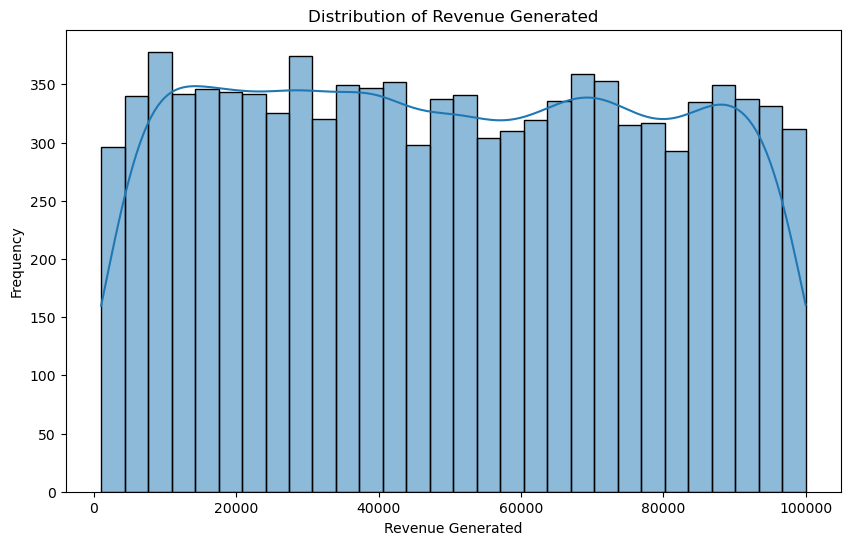

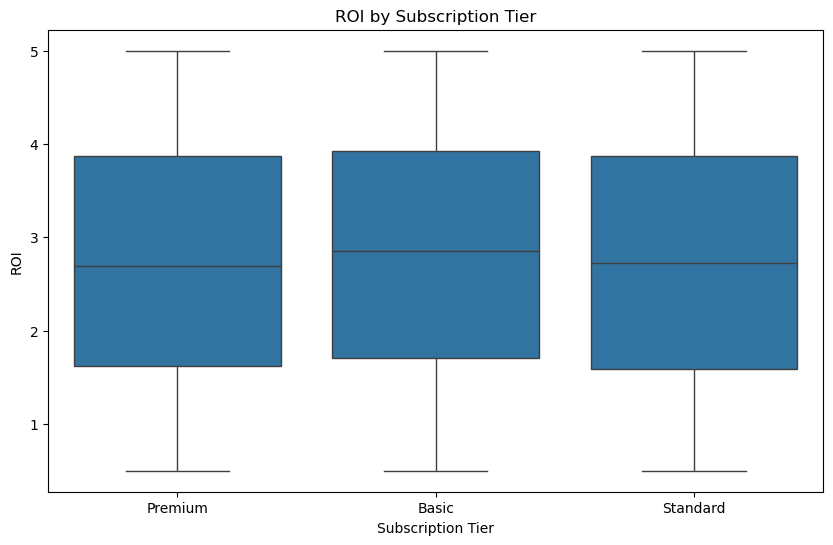

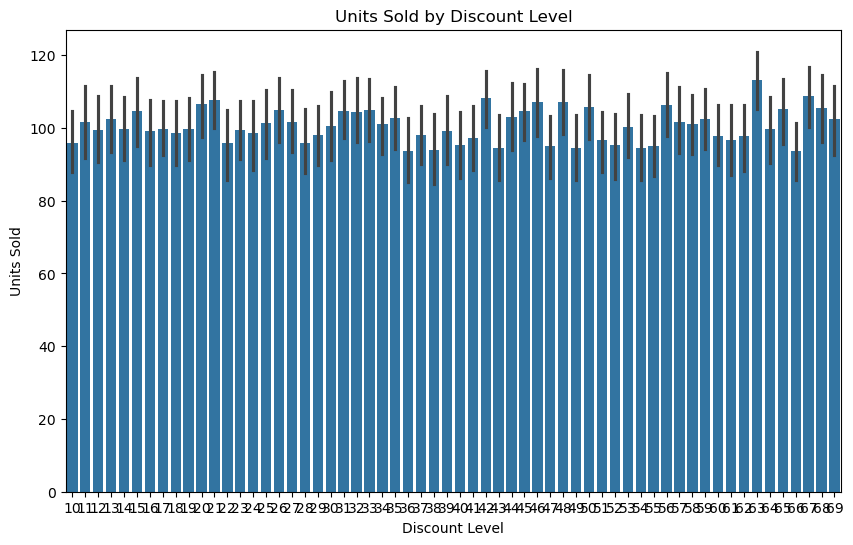

In [12]:
# Distribution of Revenue Generated
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue_Generated'], bins=30, kde=True)
plt.title('Distribution of Revenue Generated')
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')
plt.show()

# Box plot of ROI by Subscription Tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription_Tier', y='ROI', data=df)
plt.title('ROI by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('ROI')
plt.show()

# Bar plot of Units Sold by Discount Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount_Level', y='Units_Sold', data=df)
plt.title('Units Sold by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Units Sold')
plt.show()

## Predictive Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = numeric_df.drop('Revenue_Generated', axis=1)
y = numeric_df['Revenue_Generated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 848958732.6829469


## A/B testing


In [65]:
from scipy import stats
TIER_A = 'Premium'
TIER_B = 'Standard'
METRIC = 'ROI'




In [67]:
# filtiration
group_a = df[df['Subscription_Tier'] == TIER_A][METRIC].dropna()
group_b = df[df['Subscription_Tier'] == TIER_B][METRIC].dropna()
group_a

0       1.94
1       0.76
3       3.32
7       0.74
8       0.75
        ... 
9990    3.23
9992    3.31
9994    4.12
9995    4.61
9999    1.74
Name: ROI, Length: 3284, dtype: float64

In [69]:
# Two-Sample T-Test
t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)

In [71]:
print(f"Group A ({TIER_A} N={len(group_a)}): Mean {group_a.mean():.4f}")
print(f"Group B ({TIER_B} N={len(group_b)}): Mean {group_b.mean():.4f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


Group A (Premium N=3284): Mean 2.7394
Group B (Standard N=3300): Mean 2.7376
T-Statistic: 0.0553
P-Value: 0.9559


In [73]:
alpha = 0.05
if p_value < alpha:
     print(f"\nConclusion: Reject the Null Hypothesis. The difference in {METRIC} is statistically significant at alpha={alpha}.")
else:
    print(f"\nConclusion: Fail to Reject the Null Hypothesis. No statistically significant difference in {METRIC} was found at alpha={alpha}.")


Conclusion: Fail to Reject the Null Hypothesis. No statistically significant difference in ROI was found at alpha=0.05.
